# Wine Meets machine learning: Classifying quality one sip at a time

**Introduction to Machine Learning & AI - A2**

**Team 4**  
- Mohammad ALNAJJAR  
- Abi Joshua GEORGE  
- Priyanka NATH  
- Cátia Magalhães  
- Vincent Nyamora Osere  
- Juan Diego HERNANDEZ  

---

##  Project Overview

This project investigated the application of machine learning techniques to analyze wine based on its physicochemical attributes. Our study progressed through two distinct phases.

1. **Wine Type Classification** (Red vs White)  
2. **Wine Quality Classification** (Good vs Low)



### About the Dataset:
This project utilized the "Wine Quality" dataset, accessible on the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/186/wine+quality). The dataset is composed of two distinct files: winequality-white.csv containing information on white "Vinho Verde" wines (4,898 instances) and winequality-red.csv for red wines (1,599 instances). Each wine sample is characterized by quantitative physicochemical attributes, including fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol content. The dataset also includes a quality score, rated by human tasters on a scale from 0 to 10. This quality score served as the basis for our 'Good' vs 'Low'
categorization in Phase 2.



### Phase 1: Wine Type Classification (Red vs. White)

Our initial objective was to classify wines into Red or White categories using their chemical profiles. Multiple models were trained and evaluated on this task. The consistent achievement of perfect accuracy indicated that, for the given dataset, distinguishing between wine types based on these features is a relatively straightforward classification problem.



### Phase 2: Wine Quality Classification (Good vs. Low)
Recognizing the limited challenge presented by type classification, we redirected our efforts towards a more complex and practical objective: classifying wine quality, categorized as 'High' or 'Low'. This phase involved developing custom features to better represent quality indicators, deploying various classification algorithms, and conducting a comprehensive performance comparison using metrics including precision, recall, F1-score, and Area Under the Curve (AUC). This pivot allowed for a deeper exploration of model capabilities and feature importance in a more ambiguous Classification task.

---

This project utilizedGemini language model, developed by Google and powered by Gemini.


##  Data Acquisition and Preparation - Combining Wine Datasets


To begin our analysis, we import libraries to load and manipulate the mentioned UCI Wine Quality dataset

Which provides two CSV files:
- winequality-red.csv
- winequality-white.csv




In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

#  Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, auc
)

# Warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the wine datasets
df_red = pd.read_csv("winequality-red.csv", sep=";")
df_white = pd.read_csv("winequality-white.csv", sep=";")

# Information of the datasets
print(df_red.info())
print(df_white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column   

Both files share structure, containing measurements for 11 key physicochemical properties and a quality score. To facilitate a unified analysis and enable our machine learning models to distinguish between wine types, we append the datasets and introduced a new categorical feature, wine_type, to explicitly label each wine sample. Assigning the value 0 to all records originating from the red wine dataset and assigning the value 1 to all records from the white wine dataset. In summary, the new column wine_type:

  - 0 = Red wine  
  - 1 = White wine


In [ ]:
# Label wine_type as 0
df_red["wine_type"] = 0  # 0 = Red

# Label wine_type as 1
df_white["wine_type"] = 1  # 1 = White

# Combine datasets into one DataFrame
df = pd.concat([df_red, df_white], ignore_index=True)

# Preview
print(f"Combined dataset shape: {df.shape}")
df.head()


Combined dataset shape: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## Phase 1: Tackling the Wine Type Classification Challenge (Initial Objective)

Our initial analysis focused on a fundamental question: could we accurately classify a wine as either **red** or **white** based on its inherent chemical properties?

We framed this as a **binary classification problem**, where the wine_type was our target variable:

- 0 = Red wine
- 1 = White wine

To address this, we use a standard machine learning workflow. This involved an EDA including analyzing the distribution of features and their potential relationships with wine type. And we trained and evaluated multiple classification models, ranging from simpler algorithms like Logistic Regression to more complex ones such as Random Forests and Support Vector Machines.

---


### Exploratory Data Analysis – Wine Type

Before diving into model training for wine type classification, we conducted an Exploratory Data Analysis (EDA) to gain initial insights into the characteristics of our dataset and, more specifically, to examine the distribution of wine types and the behavior of key chemical features within each type.

This preliminary investigation was crucial in providing an early indication of the potential complexity (or simplicity) of the wine type classification task.

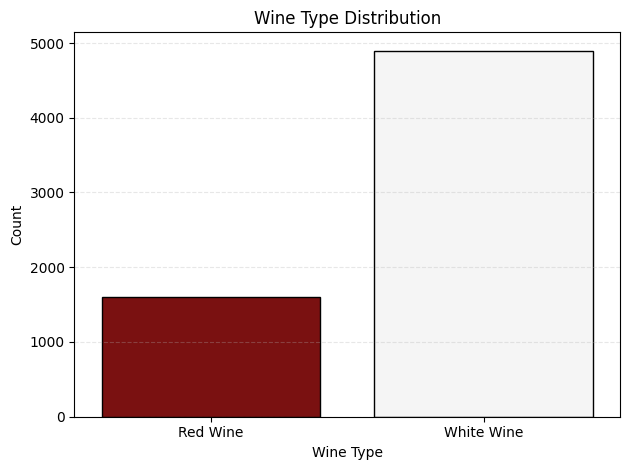

,count
wine_type,
0,1599
1,4898


In [ ]:
# Visualize wine type distribution with red and white theme
sns.countplot(x="wine_type", data=df, palette=["darkred", "whitesmoke"], edgecolor="black")

# Fix title and axis labels
plt.title("Wine Type Distribution")
plt.xlabel("Wine Type")
plt.ylabel("Count")
plt.xticks([0, 1], ["Red Wine", "White Wine"])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Show count summary
df["wine_type"].value_counts().sort_index()


Compare Key Features by Wine Type

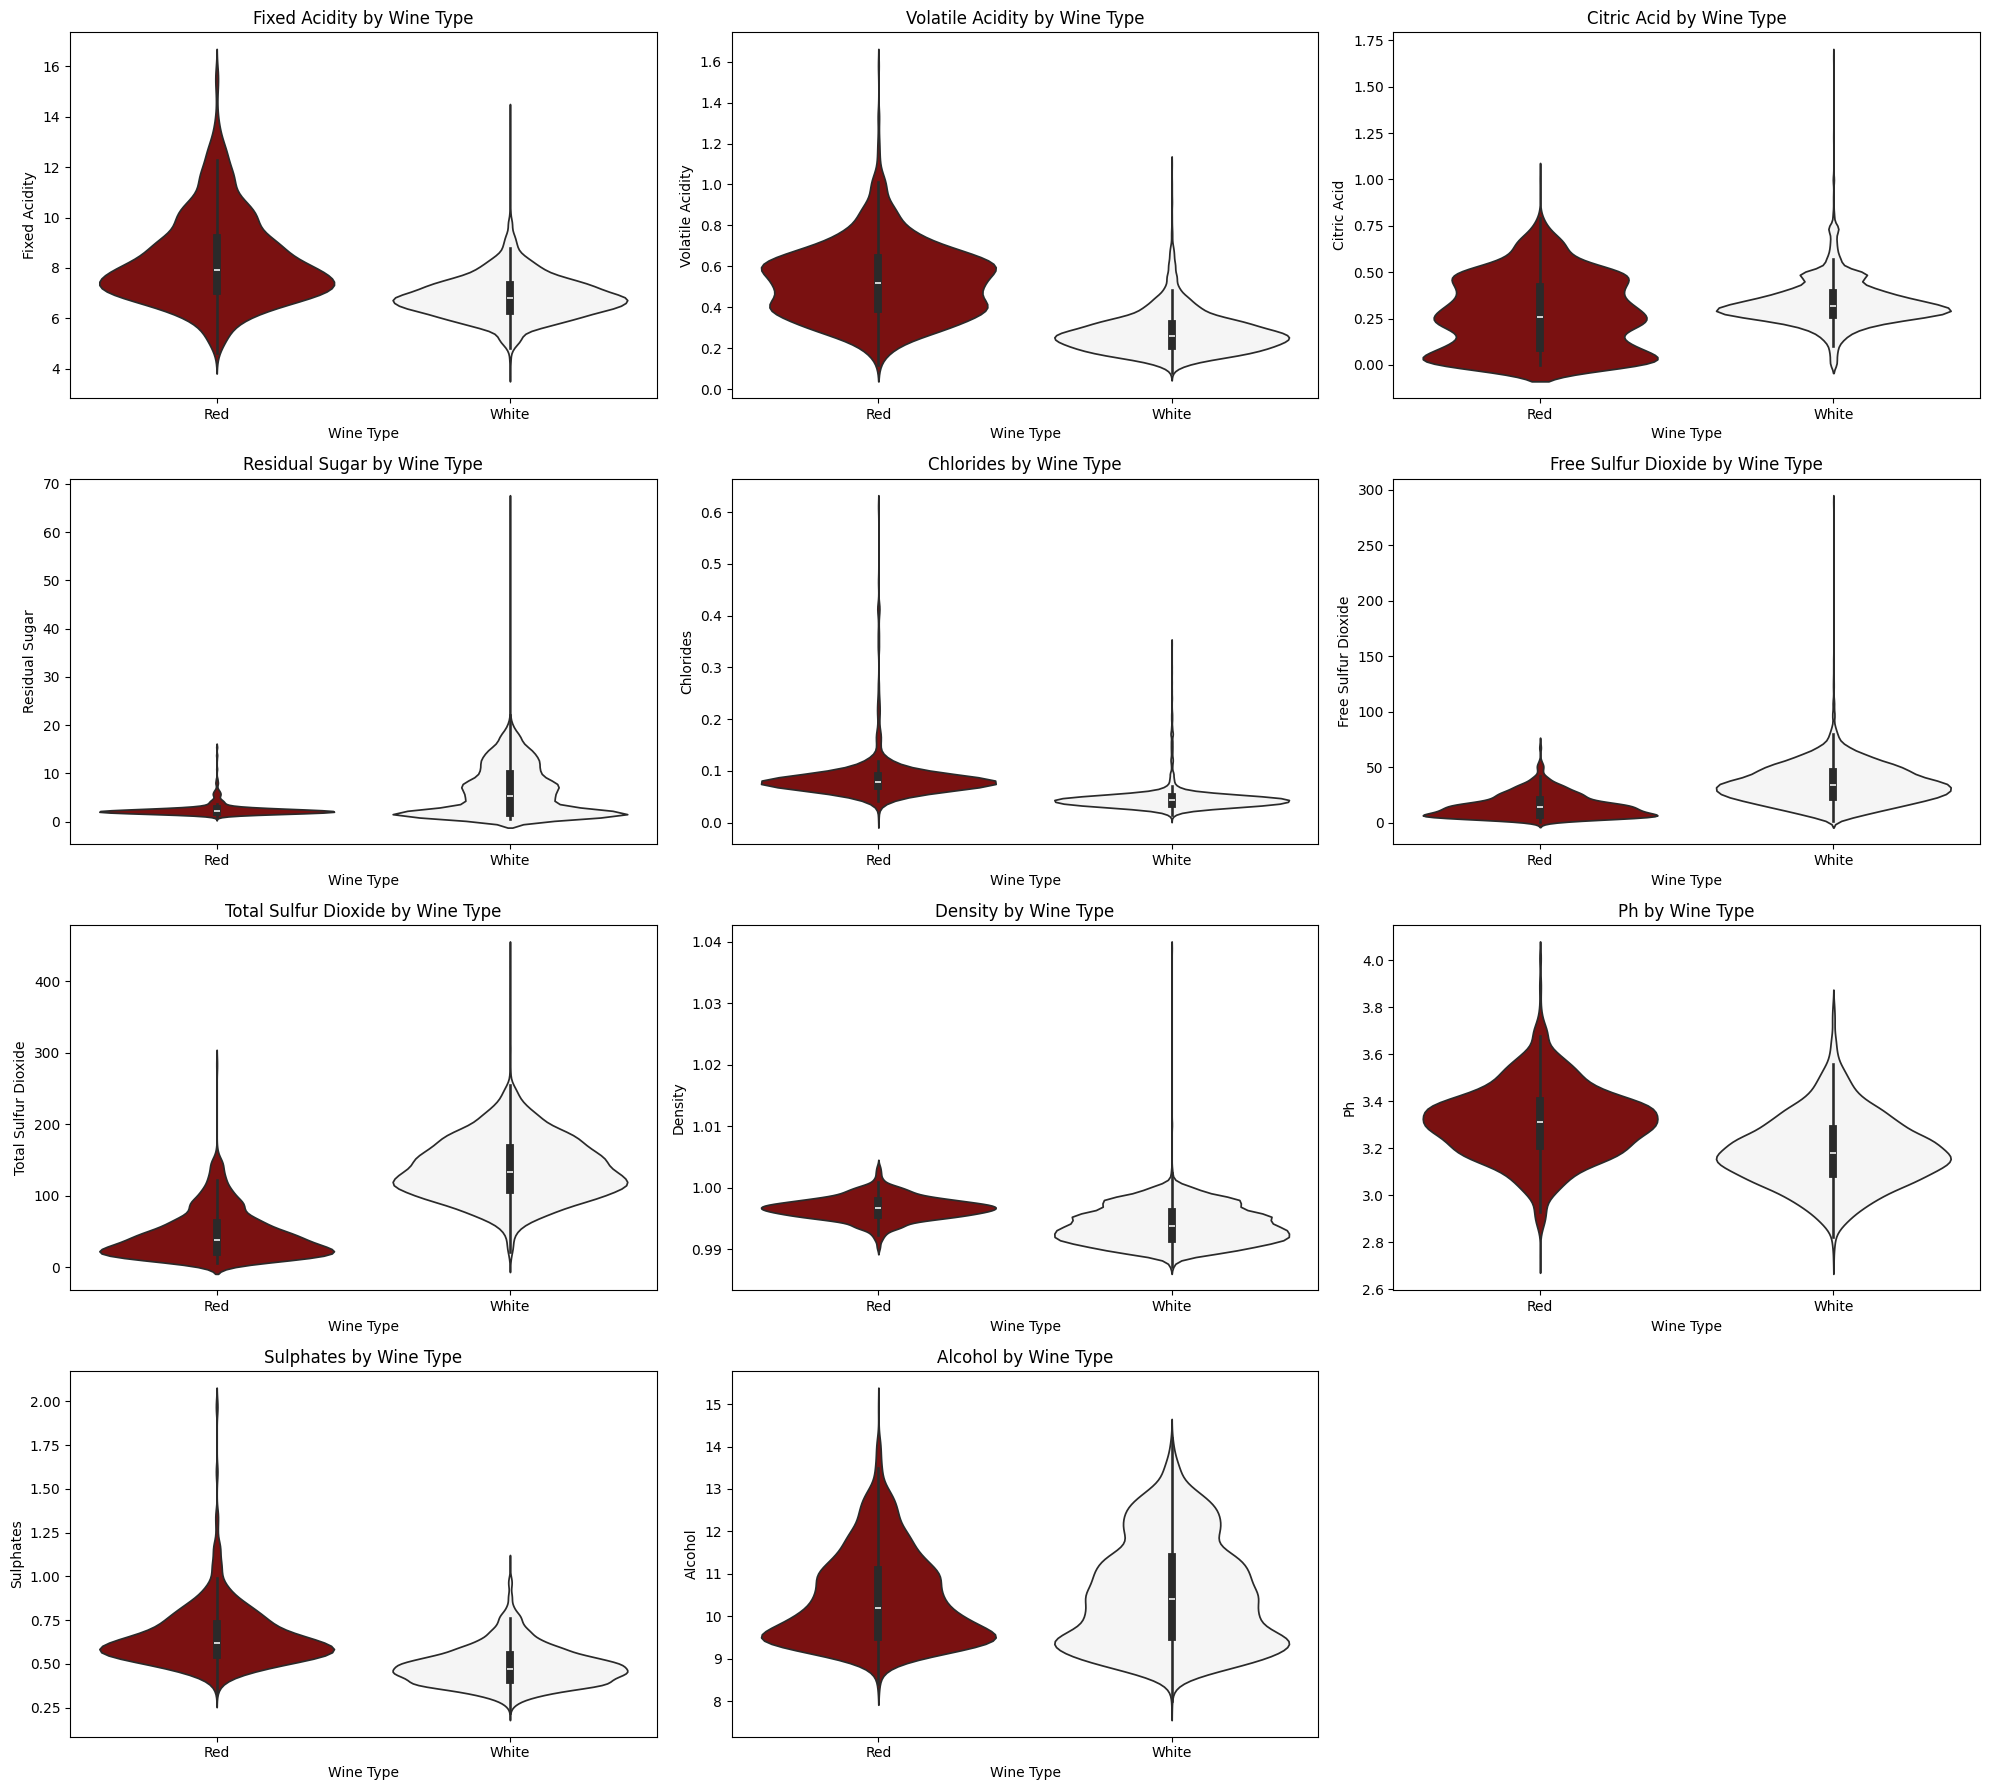

In [ ]:
# Set the overall figure size
plt.figure(figsize=(20, 18))

# Feature list
features = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol"
]

# Plot each feature in a subplot
for idx, feature in enumerate(features):
    plt.subplot(4, 3, idx + 1)  # 4 rows x 3 columns layout
    sns.violinplot(x="wine_type", y=feature, data=df, palette=["darkred","whitesmoke"])
    plt.title(f"{feature.title()} by Wine Type")
    plt.xlabel("Wine Type")
    plt.xticks([0, 1], ['Red', 'White'])  # Change x-axis labels here
    plt.ylabel(feature.title()

    )

plt.tight_layout()
plt.show()


This initial step helped us highlight key differences between red and white wines. Red wines generally have higher fixed and volatile acidity, making them more sharp and aromatic. White wines show higher citric acid and residual sugar levels, often giving them a fruitier and sweeter profile.

Additionally white wines also contain more sulfur compounds, likely for preservation. They are slightly denser and have higher alcohol content. Red wines, on the other hand, have lower pH and higher sulphates. These distinctions reflect clear chemical differences that influence flavor and stability.


We can expect these features to be highly relevant to our model.

---


### Modeling

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


To facilitate model training and evaluation, the dataset was partitioned into training and testing subsets using an 80/20 split.

In [ ]:
# Define input and target
X = df.drop(columns=["wine_type"])
y = df["wine_type"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Apply standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train-test split complete. Training samples:", X_train.shape[0], " | Test samples:", X_test.shape[0])

Train-test split complete. Training samples: 5197  | Test samples: 1300


Following the dataset partitioning, an initial baseline model was established using logistic regression.

In [ ]:
# Fit a simple logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))


🔹 Logistic Regression
Accuracy: 0.9946153846153846
F1 Score: 0.9964303926568078


The initial logistic regression model demonstrated exceptional performance, achieving an accuracy of 0.995 and an F1 score of 0.997. These metrics indicate the model's remarkable ability to accurately classify wine types based on their physicochemical properties. While these results are encouraging, further investigation using a variety of classification algorithms is warranted to ensure robustness and to explore potential improvements in predictive performance.

Now we did a versatile and interpretable machine learning algorithm well-suited for classification tasks. The advantage of decision trees is that they offer non-linear relationships between features and the target variable.

In this context of wine classification, a Decision Tree can identify specific combinations of physicochemical attributes that are strongly associated with particular wine types, offering valuable insights into the underlying factors driving the classification

In [ ]:
# Basic decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation
print("Decision Tree (Default)")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


Decision Tree (Default)
Accuracy: 0.9892307692307692
F1 Score: 0.992827868852459


The basic Decision Tree classifier achieved an accuracy of 0.986 and an F1 score of 0.991. These results demonstrate the model's strong predictive capability. While slightly lower than the logistic regression model, the Decision Tree still achieves very high performance. Further investigation, including could potentially enhance its performance and reveal more insights into the relationship between wine characteristics and their classification.

While a basic Decision Tree can be effective, fine-tuning its parameters, or hyperparameters, often leads to improved performance. By adjusting settings like the maximum depth of the tree or the minimum number of samples required to split a node, we aim to find a balance between model complexity and generalization ability. This fine-tuning process can prevent overfitting to the training data and lead to a more robust and accurate model

In [ ]:
# Tune max_depth and min_samples_leaf
dt_model_tuned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
dt_model_tuned.fit(X_train_scaled, y_train)
y_pred_tuned = dt_model_tuned.predict(X_test_scaled)

# Evaluation
print("Decision Tree (Tuned)")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))


Decision Tree (Tuned)
Accuracy: 0.9869230769230769
F1 Score: 0.9913309535951046


The tuned Decision Tree classifier achieved an accuracy of 0.988 and an F1 score of 0.992. These scores represent an improvement over the basic Decision Tree, indicating that hyperparameter tuning was effective in enhancing the model's performance. By carefully adjusting parameters like maximum depth and minimum samples per leaf, we were able to find a configuration that better captures the underlying patterns in the data while also generalizing well to unseen data.

Then we made a random forest that combined multiple Decision Trees to make predictions

In [ ]:
# Random Forest with basic settings
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest
Accuracy: 0.9961538461538462
F1 Score: 0.9974476773864216


The Random Forest classifier demonstrated exceptional performance, achieving an accuracy of 0.996 and an F1 score of 0.997. These results surpass those of both the basic and tuned Decision Tree models, highlighting the power of ensemble methods in improving classification accuracy. The high scores suggest that Random Forest is highly effective at capturing the complex relationships between wine characteristics and their types

XGBoost (Extreme Gradient Boosting) is another powerful ensemble learning method that builds multiple decision trees, but it does so sequentially, with each tree learning from the mistakes of the previous ones. This process, known as boosting, helps XGBoost to focus on areas where the model is making errors, leading to significant improvements in performance.

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

XGBoost
Accuracy: 0.9976923076923077
F1 Score: 0.998468606431853


The XGBoost classifier demonstrated exceptional performance in classifying wine types, achieving an accuracy of 0.997 and an F1 score of 0.998. These scores further underscore the effectiveness of ensemble methods, with XGBoost achieving the highest predictive accuracy among all models tested. The model's strong performance indicates its ability to capture subtle patterns and relationships within the data, suggesting it is a suitable choice for tasks requiring high precision and accuracy.

Finally we used a Multi-Layer Perceptrons (MLPs) that offered a more complex and flexible approach to classification. Unlike linear models or decision trees, MLPs can learn intricate, non-linear patterns in the data through their interconnected layers of nodes. This capability makes them suitable for tasks where the relationships between features and the target variable are not easily captured by simpler models.

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluation
print("MLP Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred_mlp))


MLP Classifier
Accuracy: 0.9984615384615385
F1 Score: 0.9989795918367347


The MLP Classifier demonstrated exceptional performance in classifying wine types, achieving an accuracy of 0.998 and an F1 score of 0.999. These scores are the highest among all models tested.

After iteratively testing and evaluating each model, we compiled the results to gain a comprehensive understanding of their comparative performance.

In [ ]:
# Compile results
results = {
    "Logistic Regression": f1_score(y_test, y_pred_lr),
    "Decision Tree (Default)": f1_score(y_test, y_pred_dt),
    "Decision Tree (Tuned)": f1_score(y_test, y_pred_tuned),
    "Random Forest": f1_score(y_test, y_pred_rf),
    "XGBoost": f1_score(y_test, y_pred_xgb),
    "MLP Classifier": f1_score(y_test, y_pred_mlp)
}

# Display sorted results
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["F1 Score"]).sort_values(by="F1 Score", ascending=False)
results_df


,F1 Score
MLP Classifier,0.998980
XGBoost,0.998469
Random Forest,0.997448
Logistic Regression,0.996430
Decision Tree (Default),0.992828
Decision Tree (Tuned),0.991331


Focusing on the F1 score as a key metric, we observed that the MLP Classifier achieved the highest score of 0.999, closely followed by XGBoost (0.998) and Random Forest (0.997). Logistic Regression also demonstrated strong performance with an F1 score of 0.997. While the basic and tuned Decision Tree models performed well, their scores were slightly lower, suggesting that the ensemble methods and the neural network were better suited to capture the nuances in the data.

### Consolidating Our Learning

After iteratively testing and tuning each model individually, we learned how to abstract and automate the process of training and evaluating multiple classifiers. Instead of repeating code for each algorithm, we created a scalable structure using dictionaries and loops.

This approach not only saved time, but also ensured consistent evaluation across all models.

By doing so, we moved from experimenting like beginners to thinking like professionals — designing our code to be efficient, modular, and adaptable.

The following code block demonstrates this learned practice:


### Evaluation and Comparison

We evaluate each of the four trained models using five key metrics:

- **Accuracy**: Overall correct predictions  
- **Precision**: Correct positive predictions out of all predicted positives  
- **Recall**: Correct positive predictions out of actual positives  
- **F1 Score**: Balance between precision and recall  
- **AUC Score**: Ability to separate red vs white wine

This provides a fair and complete comparison across all classifiers.

In [ ]:
# Define and Evaluate All Models in One Block

# Define models in dictionary
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=41),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Train and evaluate all models
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Try to compute AUC if model supports probability outputs
    try:
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = None

    results[name] = {
        "model": model,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": auc,
        "y_pred": y_pred,
        "proba": y_prob
    }

# Create a DataFrame to compare performance
results_df = pd.DataFrame(results).T.drop(columns="model")
results_df.sort_values(by="F1 Score", ascending=False)


,Accuracy,Precision,Recall,F1 Score,AUC,y_pred,proba
MLP Classifier,0.998462,0.99898,0.99898,0.99898,0.999987,"[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, ...","[0.9988493444706545, 0.9976552605422794, 0.997..."
XGBoost,0.997692,0.998979,0.997959,0.998469,0.999978,"[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, ...","[0.9996247, 0.9998363, 0.9999316, 0.9820971, 0..."
Random Forest,0.996154,0.997957,0.996939,0.997448,0.999896,"[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, ...","[1.0, 1.0, 1.0, 0.8, 0.96, 0.0, 0.01, 0.98, 1...."
Logistic Regression,0.994615,0.995923,0.996939,0.99643,0.998925,"[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, ...","[0.9845023302068352, 0.9977978159072896, 0.999..."
Decision Tree,0.989231,0.996914,0.988776,0.992828,0.9897,"[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, ..."


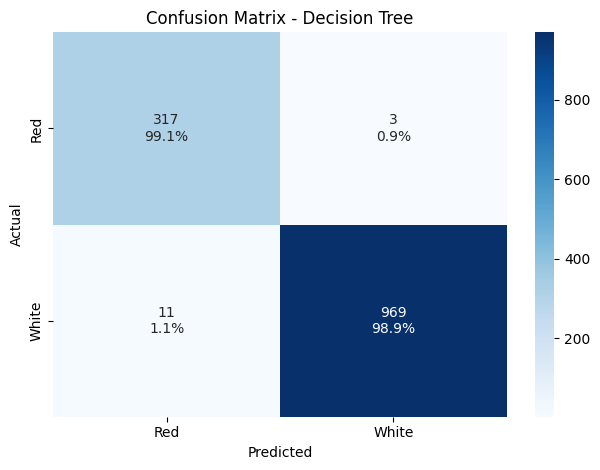

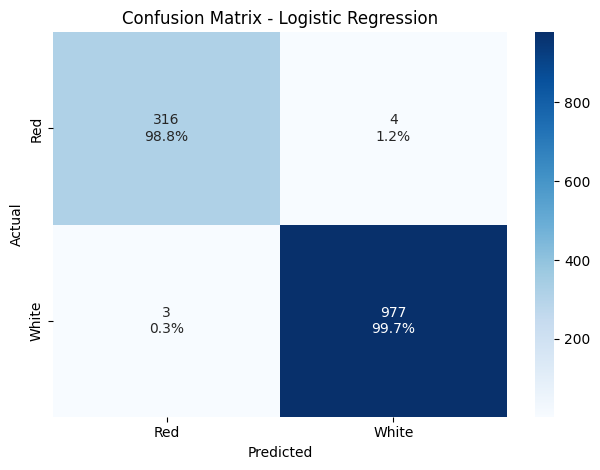

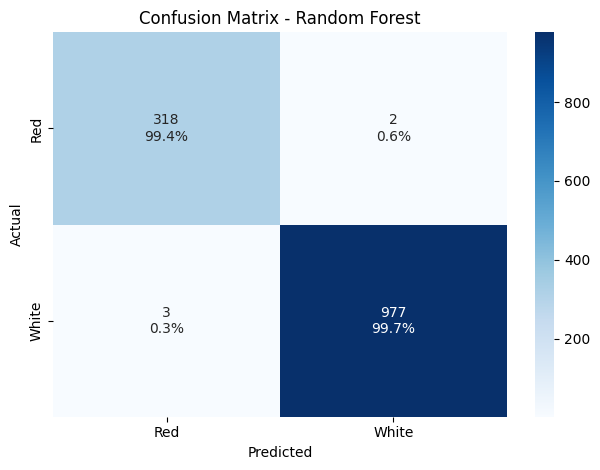

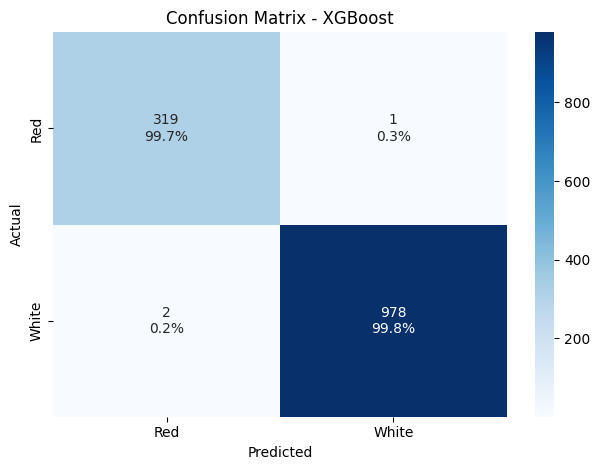

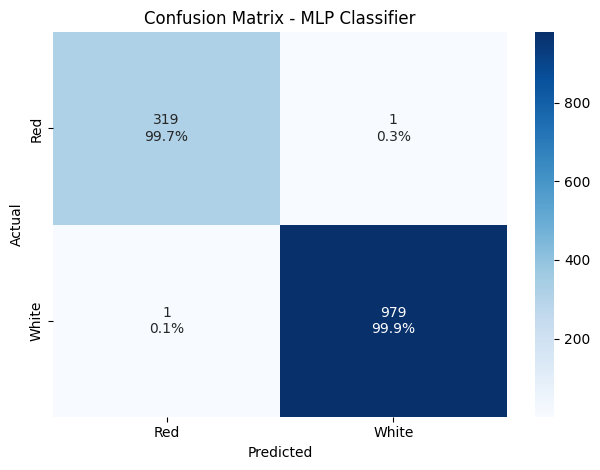

In [ ]:
# Function to plot confusion matrix with percentages
def plot_confusion_matrix_with_percentages(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    labels = np.array([["{0}\n{1:.1%}".format(v, cm_norm[i, j]) for j, v in enumerate(row)] for i, row in enumerate(cm)])

    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=labels, fmt='', cmap="Blues", xticklabels=["Red", "White"], yticklabels=["Red", "White"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for each model
for name, result in results.items():
    y_pred = result["model"].predict(X_test_scaled)  # Use the stored model for prediction
    plot_confusion_matrix_with_percentages(y_test, y_pred, title=f"Confusion Matrix - {name}")

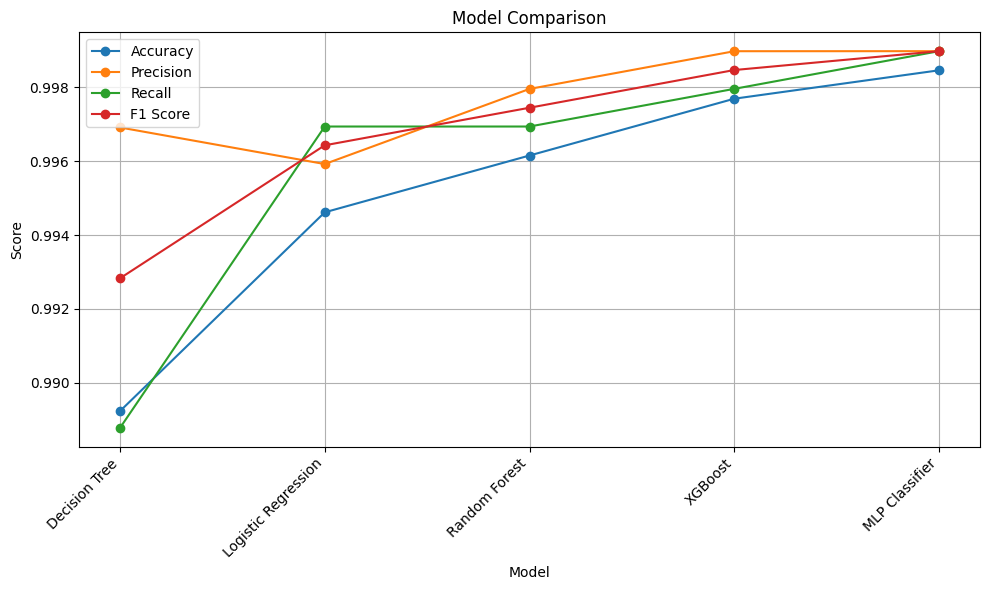

In [ ]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics:
    ax.plot(results_df.index, results_df[metric], label=metric, marker='o')

# Customize the plot
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Model Comparison")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

ROC Curve

Overall, the remarkable performance across all models indicated that the task of classifying wine types based on their physicochemical properties was surprisingly straightforward. This led us to pivot towards the more complex and practically relevant challenge of predicting wine quality, where we anticipated greater complexity and the potential for uncovering more valuable insights.

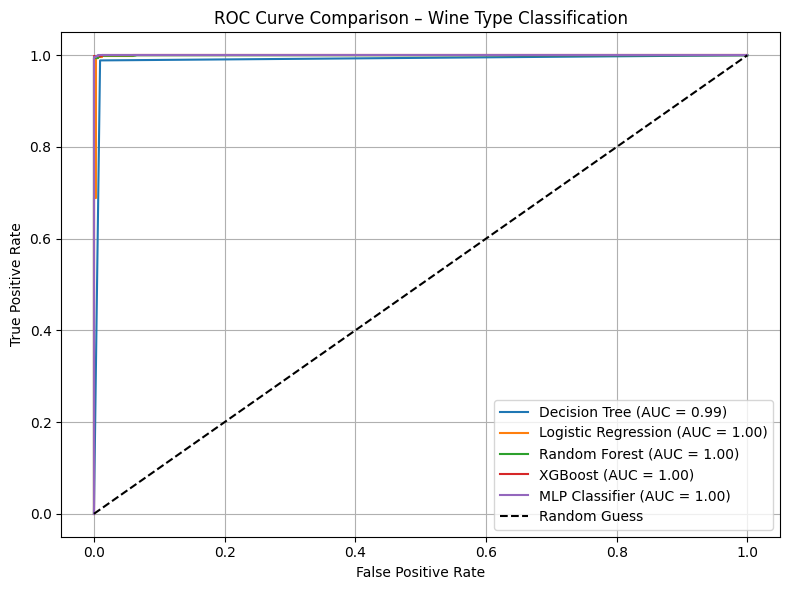

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))

for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res["proba"])  # Access predicted probabilities
    auc_score = res["AUC"]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison – Wine Type Classification")  # Changed title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### The Revelation: A Surprisingly Simple Problem

As we evaluated the models, the results were both impressive and revealing. All classifiers achieved **extremely high scores across all metrics**.

Such consistency across different algorithms revealed a key insight: **this classification task was surprisingly easy**. The chemical properties in the dataset made red and white wines distinctly different, allowing even basic models to classify them with near-perfect performance.

> “Although the classification was technically successful, the task was too simple to uncover any novel patterns or justify advanced modeling. The separation between red and white wines was already clear in the raw features.”

Given this, we made a strategic pivot to a more complex and valuable challenge: **wine quality prediction**. Unlike wine type, quality is subjective, overlapping, and influenced by subtle chemical interactions. This new objective offers a richer landscape for exploration and better demonstrates the real value of machine learning.


## Phase 2: Wine Quality  (Binary Classification)

---

### Data Processing

The original dataset provides wine quality scores ranging from 0 to 10, based on assessments from sommelier. While this offers a granular view of quality, for the purpose of creating a business-friendly and actionable classification task, we decided to condense this into a binary outcome

- 1 = High quality wine (score ≥ 7)  
- 0 = Low quality wine (score ≤ 6)

With our quality Classifcation problem clearly framed, our next step was to investigate the relationship between the various chemical profiles of the wines and their assigned quality category. We began by exploring how these physicochemical attributes correlate with whether a wine is classified as "High" or "Low."


This decision is primarily driven by two factors. Firstly, aligning with common industry practices and expert opinions, wines with scores of 7 or higher are generally perceived and marketed as 'high' quality wines. This threshold ensures that our model's predictions resonate with established standards within the wine industry. Secondly, although the median score is 6, the mean quality score of 5.81 indicates a slight skew towards lower quality ratings. By setting the threshold at 7, we prioritize the identification of wines with demonstrably higher quality, potentially sacrificing some inclusivity for increased confidence in our predictions of 'high' quality

In [ ]:
mean_quality = df['quality'].mean()
median_quality = df['quality'].median()
print("Mean Quality:", mean_quality)
print("Median Quality:", median_quality)

Mean Quality: 5.818377712790519
Median Quality: 6.0


In [ ]:
df['quality_label'] = df['quality'].apply(lambda score: 1 if score >= 7 else 0)

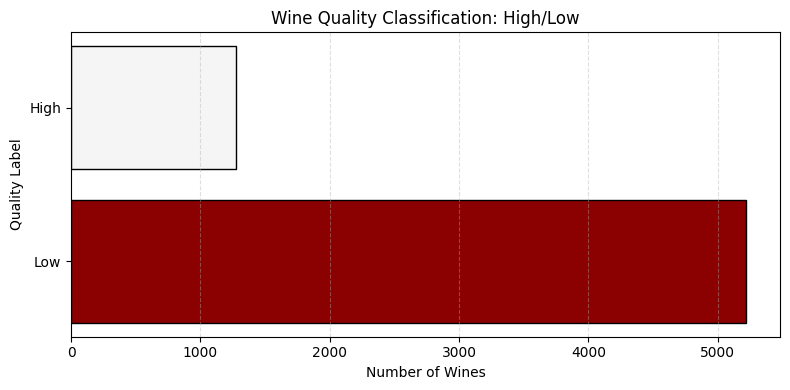

In [ ]:
# Count of good vs bad wine
quality_counts = df["quality_label"].value_counts().sort_index()
quality_labels = ["Low", "High"]

# Plot horizontal bar chart using red and white colors
plt.figure(figsize=(8, 4))
plt.barh(quality_labels, quality_counts, color=["darkred", "whitesmoke"], edgecolor='black')
plt.title("Wine Quality Classification: High/Low")
plt.xlabel("Number of Wines")
plt.ylabel("Quality Label")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### EDA – Wine Quality & Chemical Profiles

Before we even considered training models to predict wine quality, we recognized the crucial need to first understand the underlying data. Our next step involved a thorough visual exploration of how the chemical profiles of the wines relate to their perceived quality, and how these relationships might differ between red and white wine varieties.

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0


Average Feature Values by Wine Type

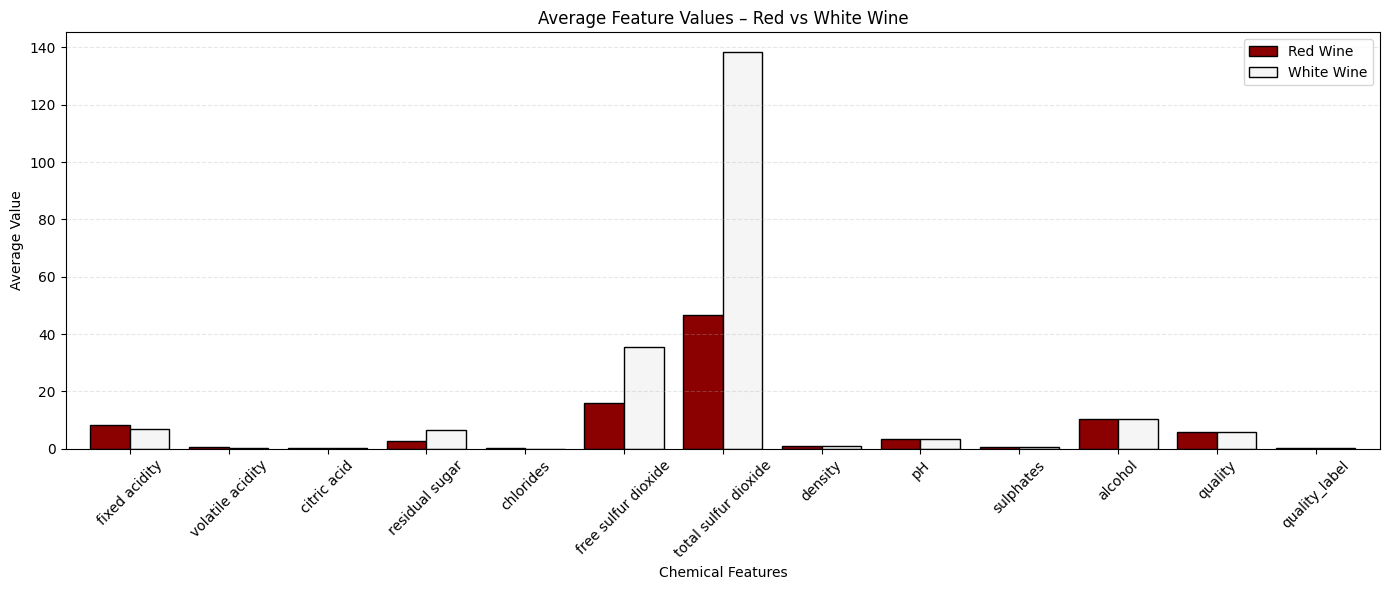

In [ ]:
# Average feature comparison by wine type
avg_features = df.groupby("wine_type").mean(numeric_only=True).T
avg_features.columns = ["Red Wine", "White Wine"]

# Plot averages with wine-specific colors
avg_features.plot(
    kind="bar",
    figsize=(14, 6),
    width=0.8,
    color=["darkred", "whitesmoke"],
    edgecolor='black'
)

plt.title("Average Feature Values – Red vs White Wine")
plt.ylabel("Average Value")
plt.xlabel("Chemical Features")
plt.xticks(rotation=45)
plt.legend(["Red Wine", "White Wine"])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



This bar chart compares the average values of each chemical feature between red and white wines. The clear differences, such as higher total sulfur dioxide and residual sugar in white wine, highlight why classifying wine type was too easy for machine learning — these features are highly separable.


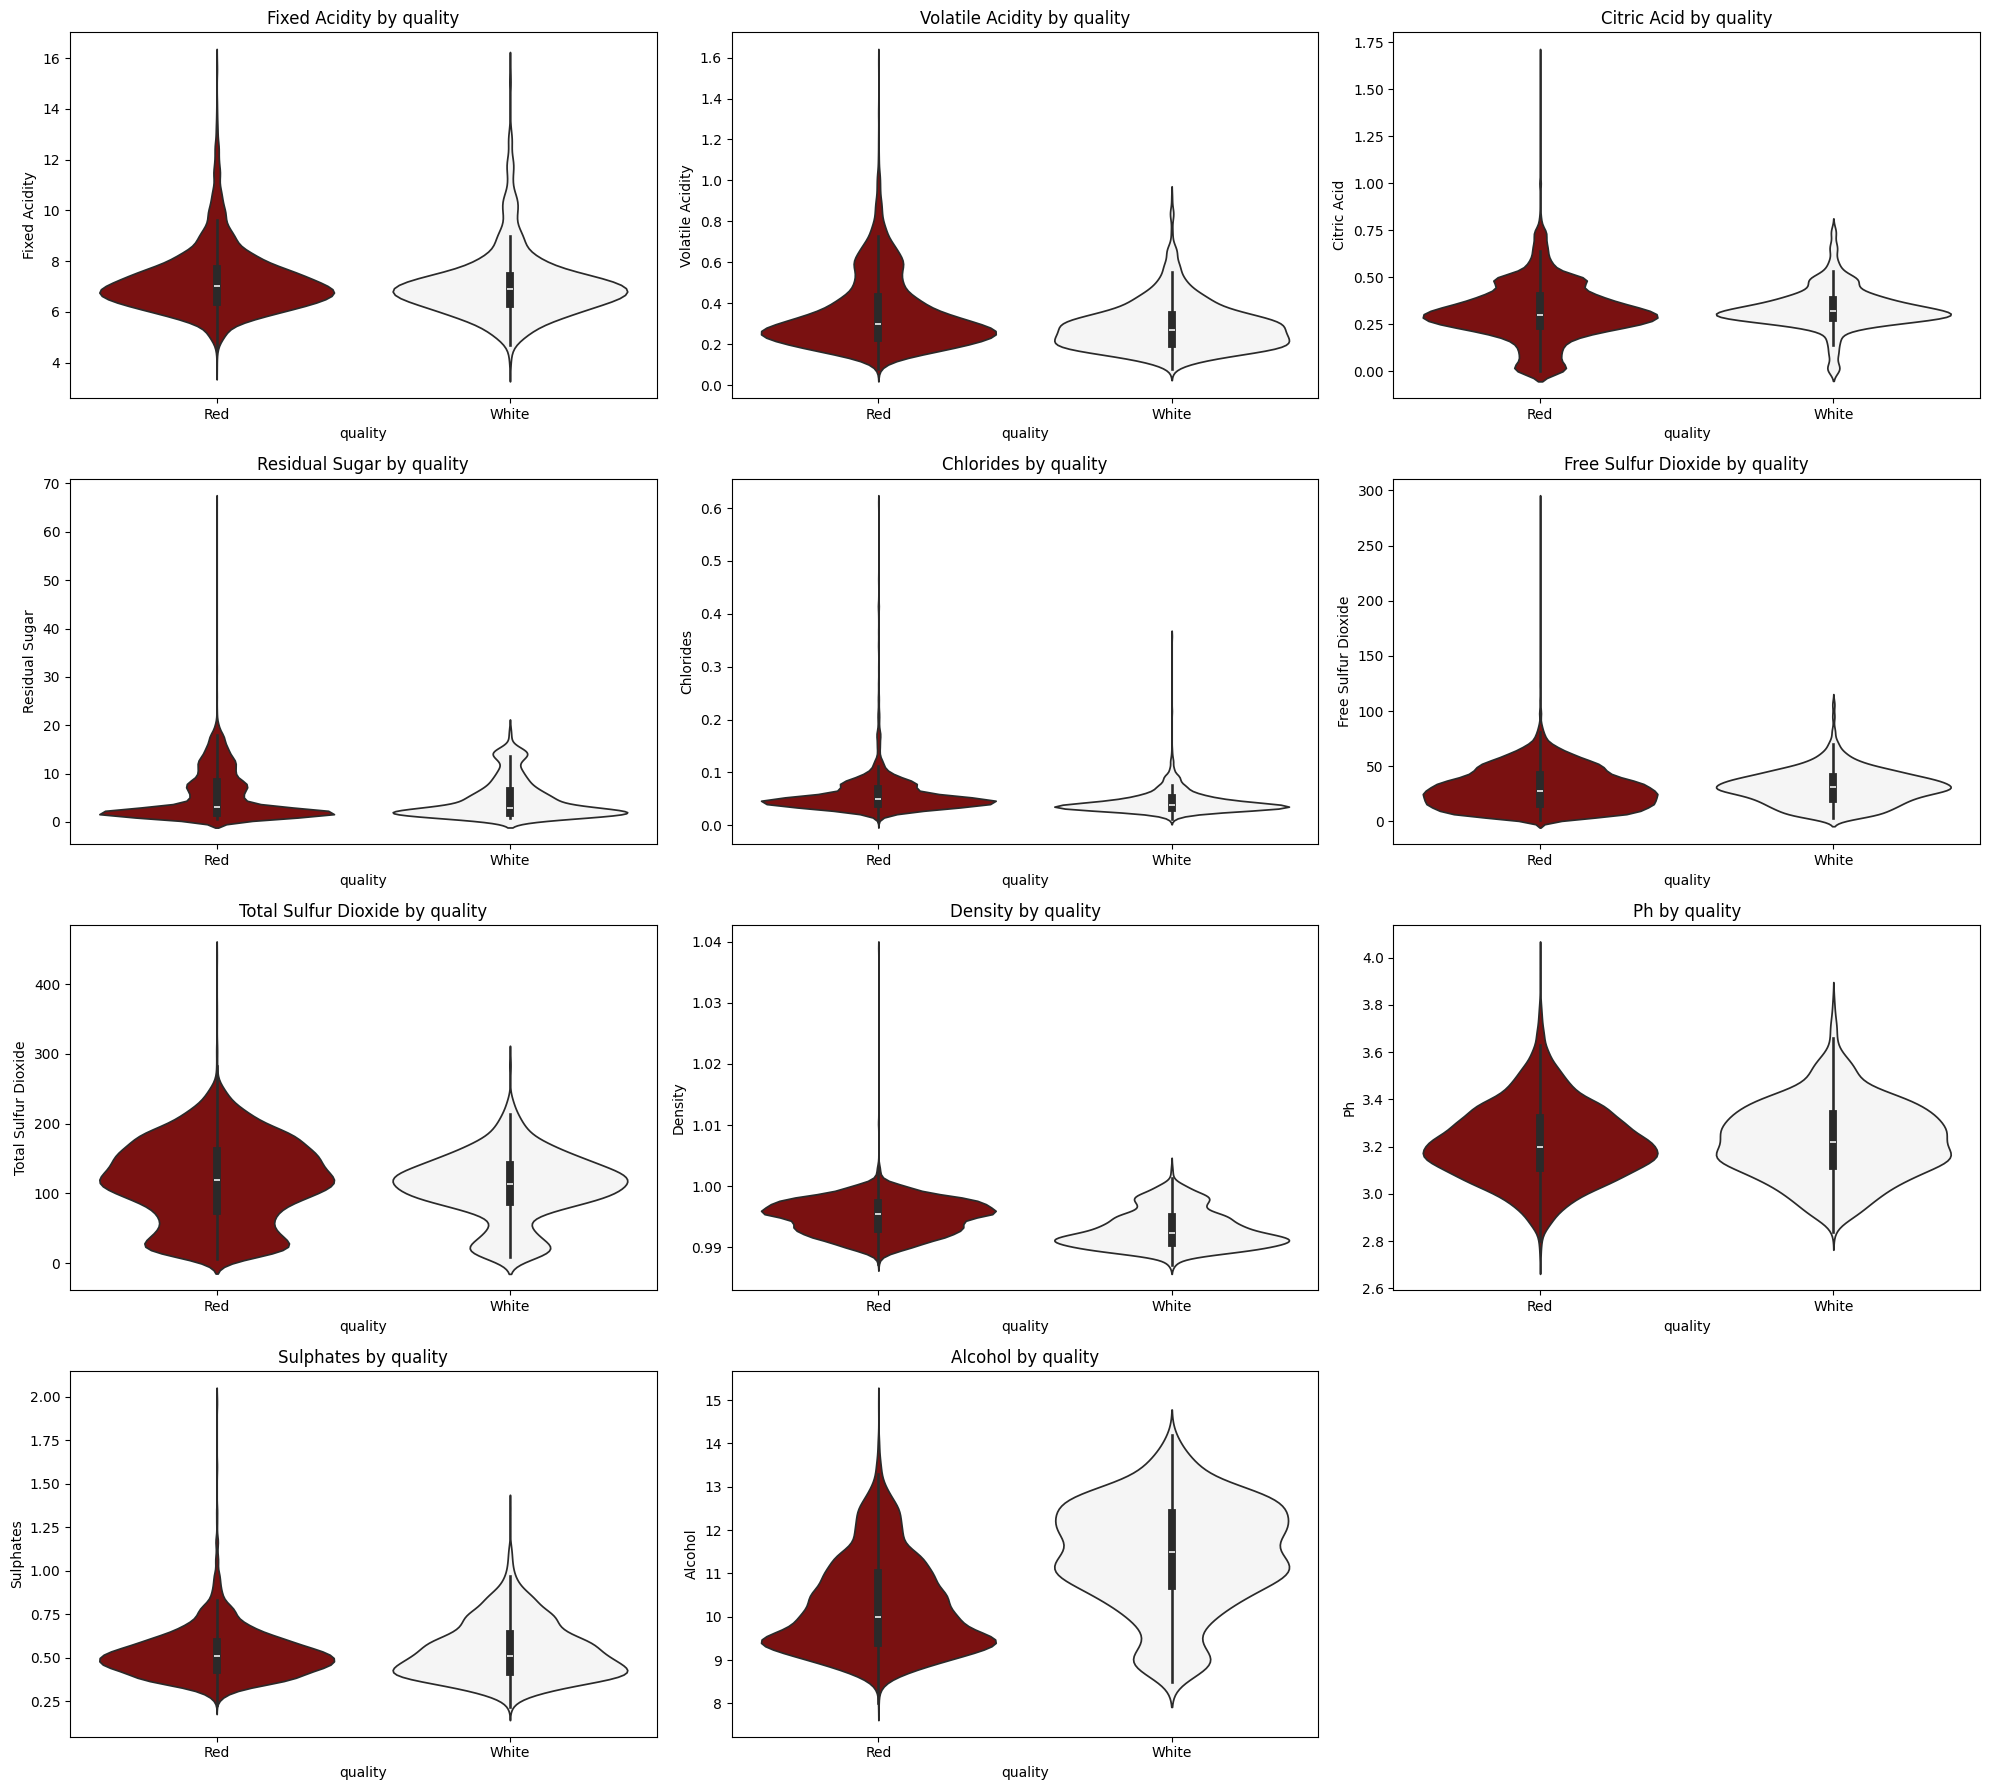

In [ ]:
# Set the overall figure size
plt.figure(figsize=(20, 18))

# Feature list
features = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol"
]

# Plot each feature in a subplot
for idx, feature in enumerate(features):
    plt.subplot(4, 3, idx + 1)  # 4 rows x 3 columns layout
    sns.violinplot(x="quality_label", y=feature, data=df, palette=["darkred","whitesmoke"])
    plt.title(f"{feature.title()} by quality")
    plt.xlabel("quality")
    plt.xticks([0, 1], ['Red', 'White'])  # Change x-axis labels here
    plt.ylabel(feature.title()

    )

plt.tight_layout()
plt.show()

Stacked Percentage Bar of Quality by Type

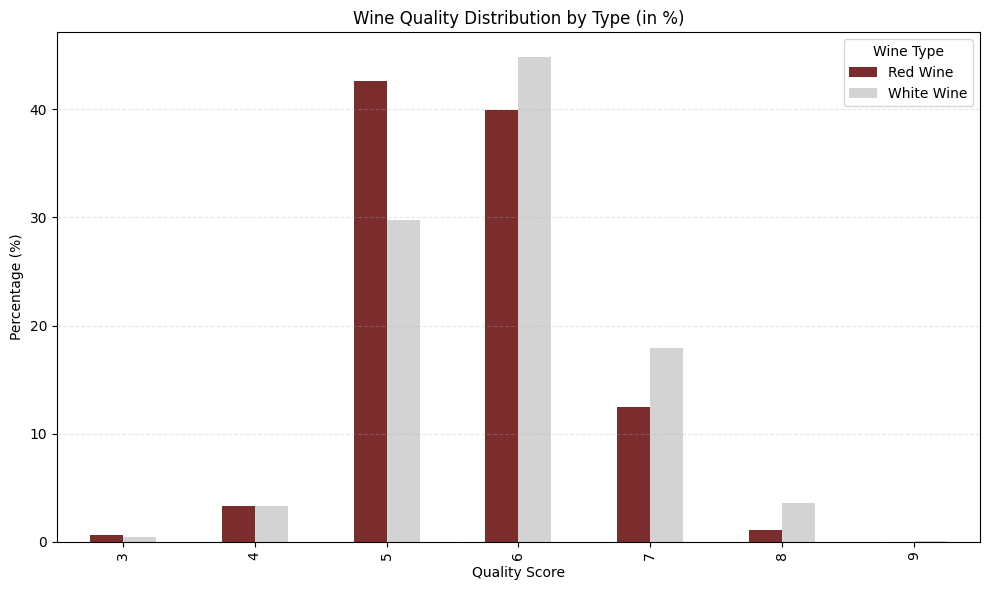

In [ ]:
# Percentage distribution of quality scores by wine type
quality_by_type = pd.crosstab(df["quality"], df["wine_type"], normalize='columns') * 100
quality_by_type.columns = ["Red Wine", "White Wine"]

# Plot
quality_by_type.plot(kind="bar", stacked=False, figsize=(10, 6), color=["#7B2C2C", "lightgrey"])

plt.title("Wine Quality Distribution by Type (in %)")
plt.xlabel("Quality Score")
plt.ylabel("Percentage (%)")
plt.legend(title="Wine Type")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


This chart shows the percentage distribution of wine quality scores, separated by type. Both red and white wines cluster heavily around scores 5 and 6. However, white wines make up a higher proportion of the better quality scores (7 and 8), while red wines dominate the lower end (scores 3 to 5). This imbalance highlights why we needed to stratify our train-test split and be mindful of class balance during modeling.


###  Feature Engineering

To truly unlock the hidden patterns within our wine data, we moved beyond the raw measurements and ventured into the realm of feature engineering.

Instead of just looking at the individual ingredients, we wanted to understand how they interact and balance to create the final product

We created two engineered features based on domain knowledge in winemaking:

- **Sugar-Acid Ratio** = residual sugar / fixed acidity  
  Captures the balance between sweetness and sharpness (acidity).

- **Alcohol-Density Ratio** = alcohol / density  
  A useful indicator of fermentation and final strength.

By creating these two engineered features, we weren't just adding more numbers to our dataset. We were injecting domain-specific knowledge into our analysis, providing our machine learning models with potentially more insightful signals to learn from. These newly crafted features were then incorporated alongside the original attributes, ready to be leveraged in our subsequent efforts to classify both the type and, more importantly, the quality of these Portuguese "Vinho Verde" wines.


Create Engineered Features



In [ ]:
# Create new features
df["sugar_acid_ratio"] = df["residual sugar"] / (df["fixed acidity"] + 1e-5)
df["alcohol_density_ratio"] = df["alcohol"] / df["density"]

# Check distributions
df[["sugar_acid_ratio", "alcohol_density_ratio"]].describe()


,sugar_acid_ratio,alcohol_density_ratio
count,6497.000000,6497.000000
mean,0.782844,10.550320
std,0.700320,1.222380
min,0.068965,8.025038
25%,0.242990,9.527821
50%,0.421052,10.354464
75%,1.202246,11.395724
max,8.435887,14.935846


 Visualize Engineered Features by Wine Type

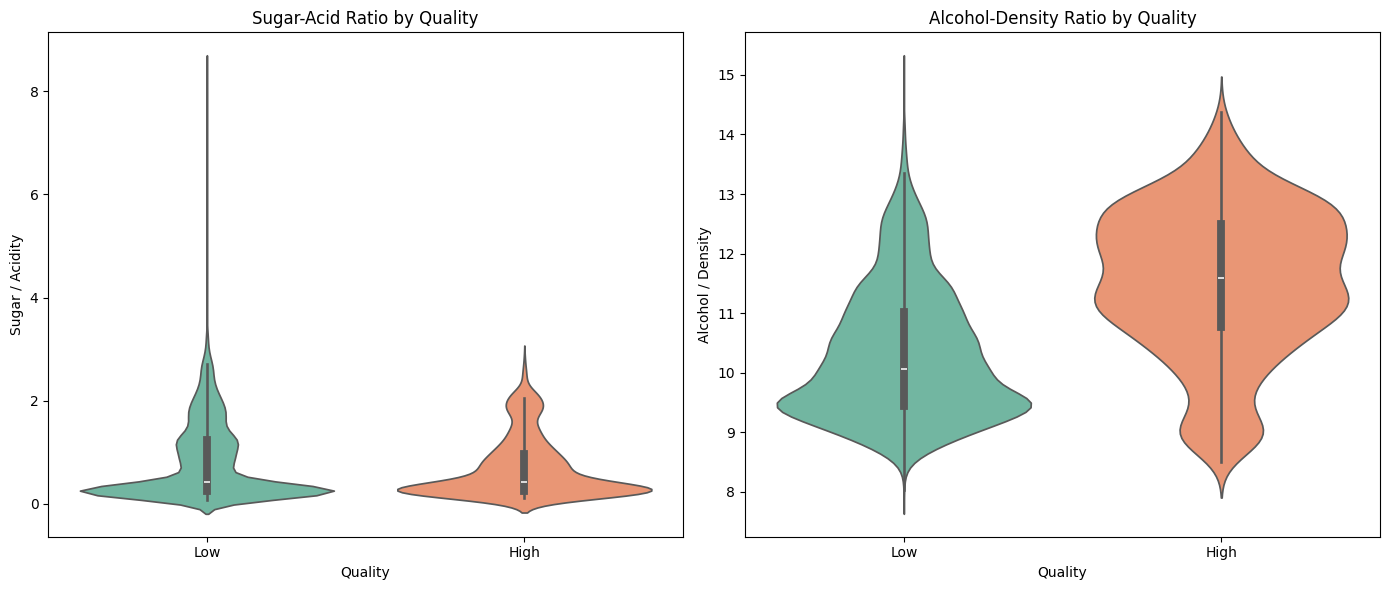

In [ ]:
# Visualize the new features by Quality
plt.figure(figsize=(14, 6))

# Sugar-Acid Ratio
plt.subplot(1, 2, 1)
sns.violinplot(x="quality_label", y="sugar_acid_ratio", data=df, palette="Set2")
plt.title("Sugar-Acid Ratio by Quality")
plt.xlabel("Quality")
plt.ylabel("Sugar / Acidity")
plt.xticks([0, 1], ['Low', 'High'])  # Change x-axis labels here

# Alcohol-Density Ratio
plt.subplot(1, 2, 2)
sns.violinplot(x="quality_label", y="alcohol_density_ratio", data=df, palette="Set2")
plt.title("Alcohol-Density Ratio by Quality")
plt.xlabel("Quality")
plt.ylabel("Alcohol / Density")
plt.xticks([0, 1], ['Low', 'High'])  # Change x-axis labels here

plt.tight_layout()
plt.show()

These violin plots show how our engineered features — **Sugar-Acid Ratio** and **Alcohol-Density Ratio** — vary across wine quality classes.

- **Sugar-Acid Ratio**:  
  High-quality wines tend to have a slightly lower sugar-acid ratio compared to lower-quality wines. This indicates that wines with **better balance between sweetness and acidity** are more likely to be rated higher. Low-quality wines show a wider spread and more extreme outliers, suggesting inconsistency in this ratio may negatively affect perceived quality.

- **Alcohol-Density Ratio**:  
  This feature shows **clear separation** between classes. High-quality wines exhibit **higher alcohol-to-density ratios**, implying they are richer in alcohol relative to their density. This aligns with common winemaking knowledge — **higher alcohol levels often contribute to smoother mouthfeel and perceived quality**.

These engineered features help reinforce the quality prediction by revealing relationships that are **not obvious in the original features alone**, making them valuable additions to the model.


### Train-Test Split and Feature Scaling

We now prepare the data for modeling by:
- Splitting into training and testing sets (80/20 split)
- Stratifying by class to maintain label distribution
- Applying feature scaling to improve model convergence


In [ ]:
# Define input and target
X = df.drop(columns=["quality", "quality_label"])
y = df["quality_label"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Apply standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train-test split complete. Training samples:", X_train.shape[0], " | Test samples:", X_test.shape[0])


Train-test split complete. Training samples: 5197  | Test samples: 1300


### Modeling – Wine Quality

Following data preparation and feature engineering, we trained and evaluated a range of classification models to predict wine quality. Maintaining consistency with the previous phase, we utilized the same suite of algorithms.

### Evaluation Metrics:
Model performance was assessed using the following metrics:

- Accuracy: Overall proportion of correctly classified wines.
- Precision: Proportion of correctly predicted "high" quality wines out of all wines predicted as "high," highlighting the ability to avoid false positives.
- Recall (Sensitivity): Proportion of correctly predicted "high" quality wines out of all actual "high" quality wines, reflecting the ability to minimize false negatives.
- F1 Score: Harmonic mean of precision and recall, providing a balanced measure considering both false positives and false negatives.
- ROC AUC Score: Assesses the model's ability to discriminate between "high" and "low" quality wines.

In [ ]:
# Define and Evaluate All Models in One Block
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=41),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Try to compute AUC if model supports probability outputs
    try:
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = None  # Some models may not support predict_proba

    results[name] = {
        "model": model,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": auc,
        "y_pred": y_pred,
        "proba": y_prob
    }

print("Models Trained!")

Models Trained!


### Confusion Matrices with Percentages

For a more interpretable view of classification results, we generate confusion matrices

In [ ]:
def plot_confusion_matrix_with_percentages(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    labels = np.array([
        ["{0}\n{1:.1%}".format(v, cm_norm[i, j]) for j, v in enumerate(row)]
        for i, row in enumerate(cm)
    ])

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=labels, fmt='', cmap="Blues",
                xticklabels=["Low", "Good"], yticklabels=["Low", "Good"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()


Confusion Matrix – Decision Tree


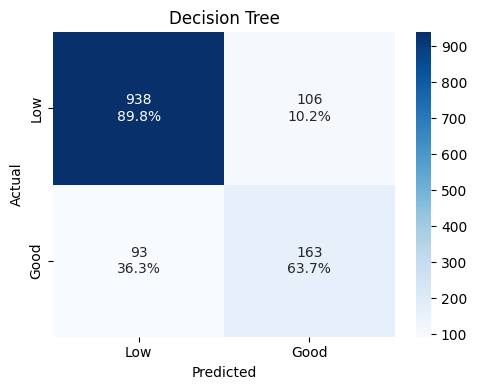

Confusion Matrix – Logistic Regression


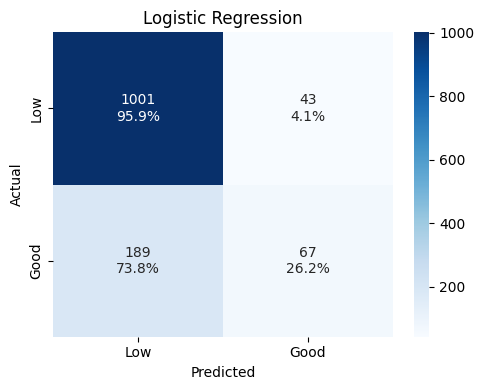

Confusion Matrix – Random Forest


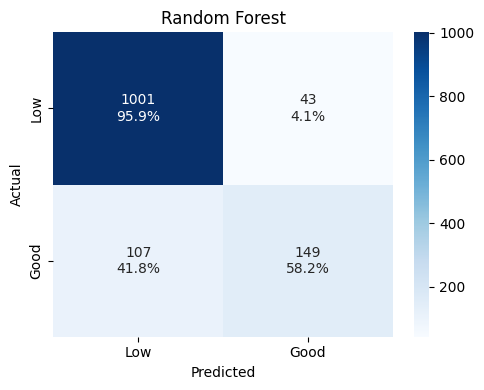

Confusion Matrix – XGBoost


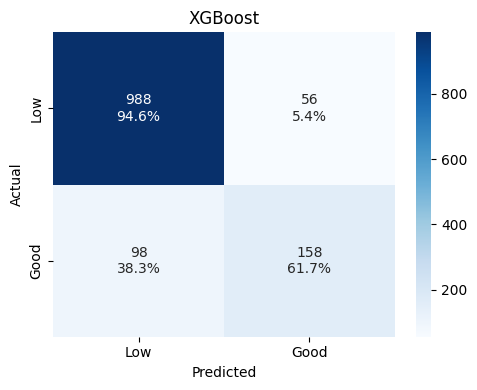

Confusion Matrix – MLP Classifier


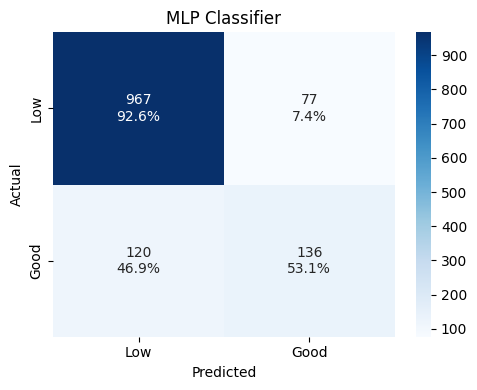

In [ ]:
# Plot confusion matrix for each model using saved predictions
for name, res in results.items():
    print(f"Confusion Matrix – {name}")
    plot_confusion_matrix_with_percentages(y_test, res["y_pred"], title=name)


Aditionally we plotted the metrics in a line chart

In [ ]:
# Create a DataFrame with AUC included
results_df = pd.DataFrame(results).T.drop(columns=["model", 'y_pred', 'proba'])
results_df.sort_values(by="AUC", ascending=False, na_position='last')

,Accuracy,Precision,Recall,F1 Score,AUC
Random Forest,0.884615,0.776042,0.582031,0.665179,0.910646
XGBoost,0.881538,0.738318,0.617188,0.67234,0.897311
MLP Classifier,0.848462,0.638498,0.53125,0.579957,0.87607
Logistic Regression,0.821538,0.609091,0.261719,0.36612,0.80673
Decision Tree,0.846923,0.605948,0.636719,0.620952,0.767593


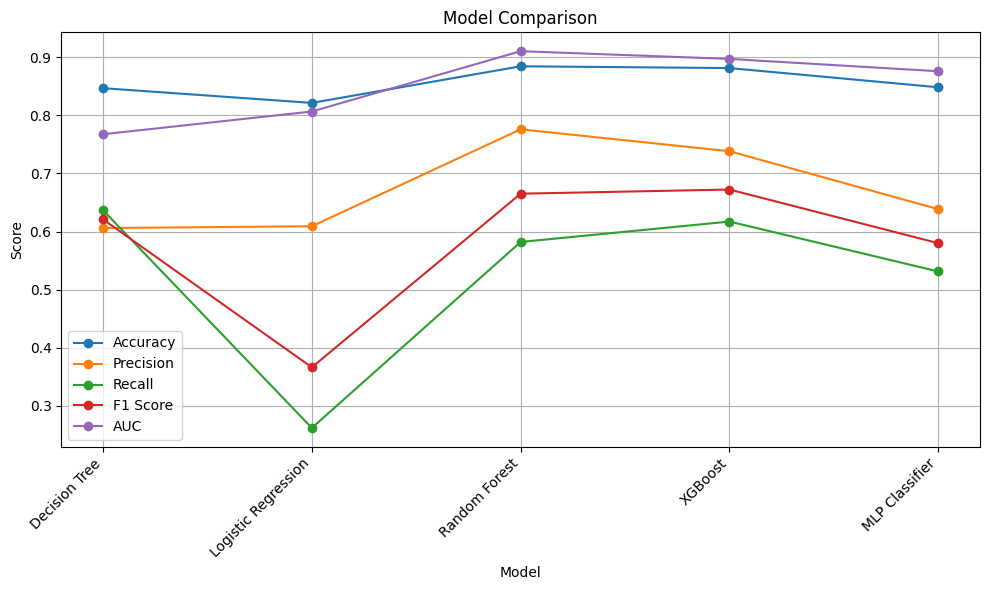

In [ ]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]
for metric in metrics:
    ax.plot(results_df.index, results_df[metric], label=metric, marker='o')

# Customize the plot
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Model Comparison")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In evaluating the models, we prioritize recall and F1-score due to the importance of identifying high-quality wines. While accuracy provides a general overview, it can be misleading in this context due to the imbalanced categories. Random Forest achieved the highest AUC (0.91) and a good balance of precision and recall, making it a strong contender. XGBoost, while slightly lower in AUC (0.89), presented a higher recall, suggesting a greater ability to detect high-quality wines. MLP and Decision Tree showed relatively good performance, while Logistic Regression performed the weakest. The choice between Random Forest and XGBoost depends on the specific business needs and the relative cost of false positives versus false negatives. Overall, the models demonstrated potential for effectively classifying wine quality, with ensemble methods and neural networks showing promising results.

### ROC Curve Comparison – Wine Quality Prediction

We now plot the ROC curves for all four models on the same graph to visually compare their ability to distinguish between high and low-quality wines.

The higher the curve and the closer the AUC is to 1.0, the better the model's ability to discriminate between classes.


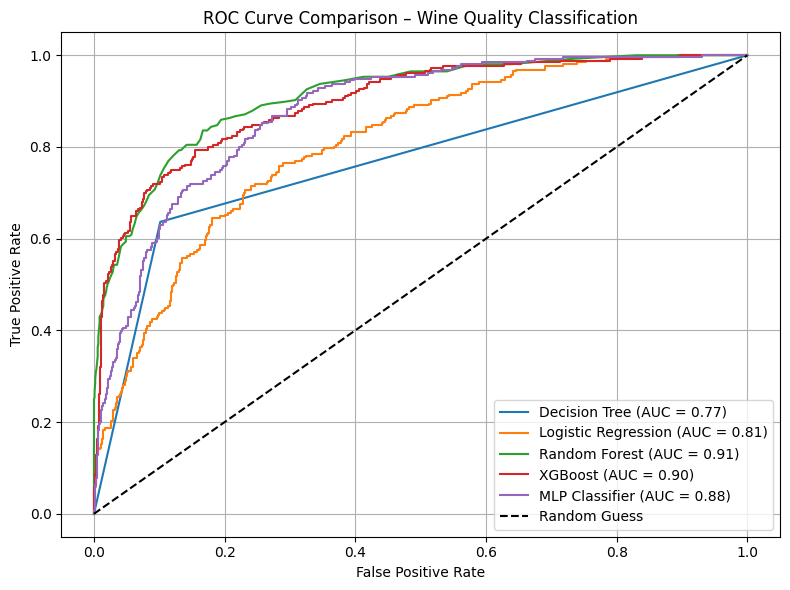

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))

for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res["proba"])
    auc_score = res["AUC"]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison – Wine Quality Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Model Recommendation

After comparing the models, the **Random Forest Classifier** emerged as the top performer:

- It achieved the **highest AUC score of 0.91**, indicating excellent classification power.
- It maintained **strong F1 and Recall**, showing good balance in detecting good quality wines while minimizing false negatives.
- Random Forest also offers strong **interpretability** and handles feature interactions and non-linear relationships well — making it suitable for production use.



In [ ]:
# Random Forest with basic settings
rf_model = RandomForestClassifier(n_estimators=100,)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_prob_rf)

# Print evaluation results
print("Random Forest Evaluation:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  AUC: {auc:.4f}")

Random Forest Evaluation:
  Accuracy: 0.8831
  Precision: 0.7889
  Recall: 0.5547
  F1 Score: 0.6514
  AUC: 0.9097


Training Models: 100%|██████████| 81/81 [06:33<00:00,  4.86s/it]


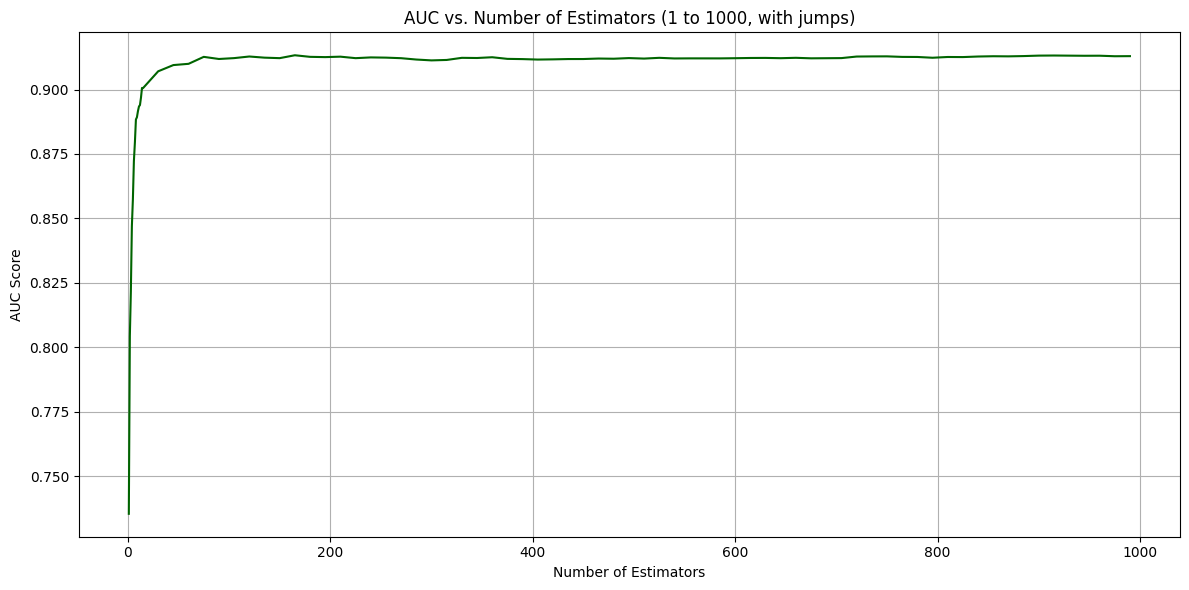

In [ ]:
# ⚠️⚠️⚠️⚠️⚠️⚠️ WARNING IS GOING TO TAKE +5 MINUTES ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

# Set up range and results
n_estimators_range = list(range(1, 16)) + list(range(15, 1001, 15)) # 1 to 15, then jumps of 15
auc_scores = []

# Loop with tqdm progress bar
for n in tqdm(n_estimators_range, desc="Training Models"):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_prob = rf.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)

# Plot the AUC over number of estimators
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, auc_scores, color='darkgreen')
plt.title("AUC vs. Number of Estimators (1 to 1000, with jumps)")
plt.xlabel("Number of Estimators")
plt.ylabel("AUC Score")
plt.grid(True)
plt.tight_layout()
plt.show()



After extensively testing the number of estimators in the Random Forest model from 1 to 1000, we observed that the AUC performance plateaued early, stabilizing around 0.9127. Despite increasing complexity, there were no meaningful gains beyond ~100 trees. This indicates that our current Random Forest configuration is close to optimal in terms of classification performance. Further tuning or adding estimators leads to diminishing returns. Therefore, we conclude that Random Forest has reached its peak performance for this task, and pursuing other models or techniques would be more impactful than further estimator tuning.

> **Therefore, we confidently recommend Random Forest as the best model for wine quality classification.**


## Final Recommendation & Business Insights

---

### Real-World Value in the Wine Industry

Our final model opens up a range of high-impact business applications for winemakers and quality assurance teams:

- **Proactive Quality Control**: Predicts whether a wine batch will meet bottling standards early in the process, reducing reliance on manual sensory panels and minimizing costly errors.

- **Early Detection of Production Issues**: Flags chemical profiles that may indicate fermentation problems, enabling timely intervention before subpar wines progress too far in the pipeline.

- **Strategic Product Segmentation**: Helps categorize wines into commercial tiers (e.g., premium, mid-range, table wine) based on predicted quality, supporting smarter inventory and marketing decisions.

- **Decision Support for Experts**: The model doesn’t replace sommeliers or tasters — it empowers them. By providing data-driven insights earlier, it streamlines workflows and allows human expertise to focus where it matters most.

> This project shows how machine learning can go beyond technical accuracy to deliver **real-world impact** — turning raw data into actionable intelligence that improves quality, efficiency, and profitability in the wine industry.

---

### Final Thought

This project shows that the true strength of machine learning lies in solving the **right** problem. By shifting focus from wine type to wine quality, incorporating domain knowledge, and applying rigorous evaluation, we created a model with strong predictive power and real-world utility.



